**Data** **Exploration**

In [69]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing the dataset
df = pd.read_csv("kecelakaan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Feature Importance**

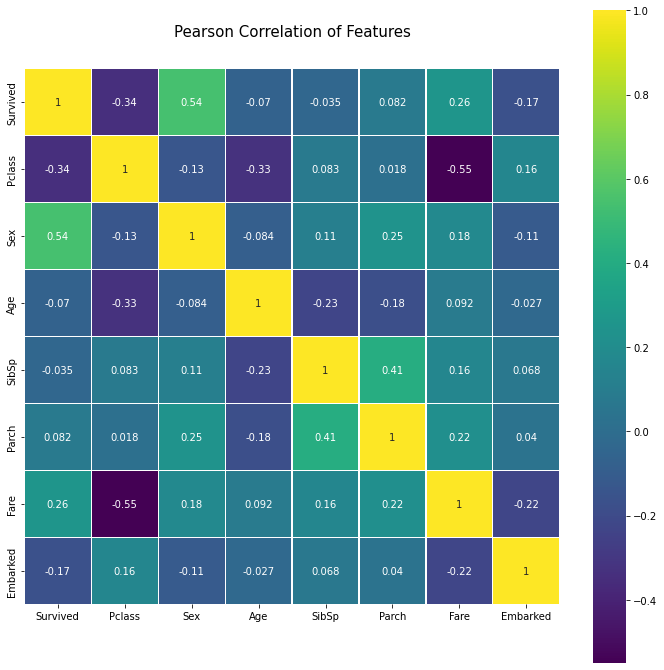

In [70]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(updated_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('FI.png')

**Data Prepocessing**

Feature Selection




In [71]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Fill the Missing Value


In [72]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [73]:
updated_df = df
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean()) #Use the attribute mean to fill in the missing value
# updated_df['Cabin']=updated_df['Cabin'].fillna('U') #Use a global constant to fill in the missing value
# updated_df['Embarked']=updated_df['Embarked'].fillna('S') #fill these with the most common one.
updated_df['Embarked']=updated_df['Embarked'].fillna(updated_df['Embarked'].mode()[0]) #Use the attribute mode to fill in the missing value
updated_df.drop("Cabin",axis=1,inplace=True)
updated_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Encoded to Numerical Value

In [74]:
updated_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
updated_df['Sex'] = updated_df['Sex'].map({'male':0, 'female':1})
updated_df['Embarked'] = updated_df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [76]:
updated_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


**Data** **Classifcation**

In [77]:
#split dataset in features and target variable
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = updated_df[feature_cols] # Features
y = updated_df.Survived # Target variable

In [78]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [80]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 0.746268656716418
Precision: 0.7156862745098039
Recall: 0.6517857142857143
Confusion matrix:
 [[127  29]
 [ 39  73]]


In [81]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # sigmoid Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 0.667910447761194
Precision: 0.6825396825396826
Recall: 0.38392857142857145
Confusion matrix:
 [[136  20]
 [ 69  43]]


In [82]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 0.6791044776119403
Precision: 0.8421052631578947
Recall: 0.2857142857142857
Confusion matrix:
 [[150   6]
 [ 80  32]]


In [83]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree=8) # Poly Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 0.664179104477612
Precision: 0.9230769230769231
Recall: 0.21428571428571427
Confusion matrix:
 [[154   2]
 [ 88  24]]


**Data Visualization**

In [21]:
# No. of survivors and non-survivors of the incident
# total_survived = updated_df["Survived"].sum() # sum of rows
# total_deceased = len(updated_df["Survived"]) - total_survived
# print("Out of {} passengers, {} died {} survived ".format(len(updated_df), total_deceased, total_survived))   

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived    0    1
Survived          
0         549    0
1           0  342


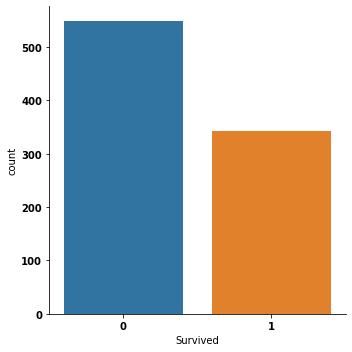

In [ ]:
sns.factorplot('Survived',data=updated_df,kind='count')
print(pd.crosstab(updated_df["Survived"],updated_df.Survived))
plt.savefig('Survived.png')

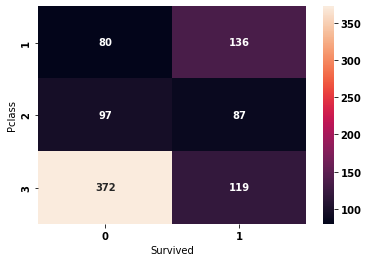

In [ ]:
# Group the dataset by Pclass and Survived and then unstack them
group = updated_df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")
plt.savefig('Pclass.png')

Survived    0    1
Sex               
0         468  109
1          81  233


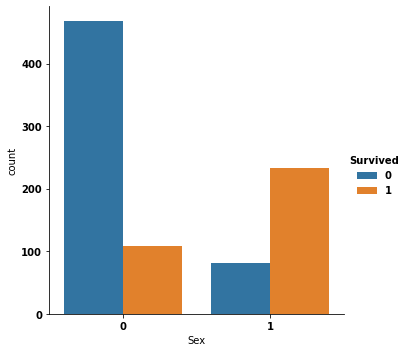

In [ ]:
print(pd.crosstab(updated_df["Sex"],updated_df.Survived))
# Countplot
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = updated_df)
plt.savefig('Sex.png')

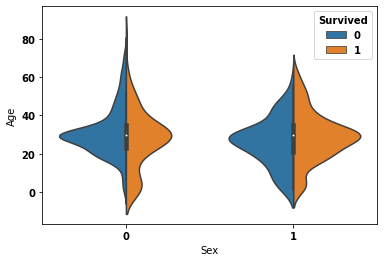

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = updated_df, split = True)
plt.savefig('Age.png')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


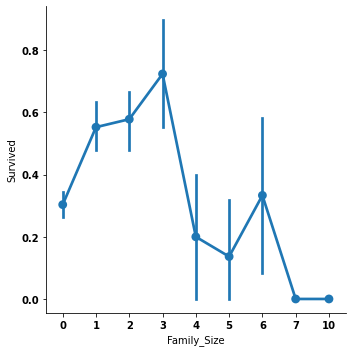

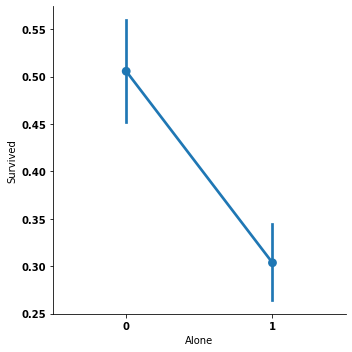

In [ ]:
# Adding a column Family_Size
updated_df['Family_Size'] = 0
updated_df['Family_Size'] = updated_df['Parch']+updated_df['SibSp']
 
# Adding a column Alone
updated_df['Alone'] = 0
updated_df.loc[updated_df.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = updated_df)
plt.savefig('FamilySize.png')
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = updated_df)
plt.savefig('Alone.png')

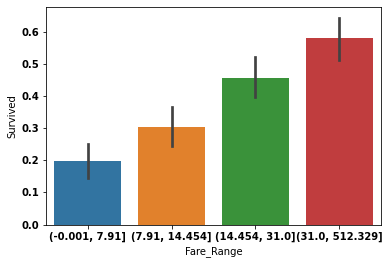

In [ ]:
# Divide Fare into 4 bins
updated_df['Fare_Range'] = pd.qcut(updated_df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',data = updated_df)
plt.savefig('Fare.png')

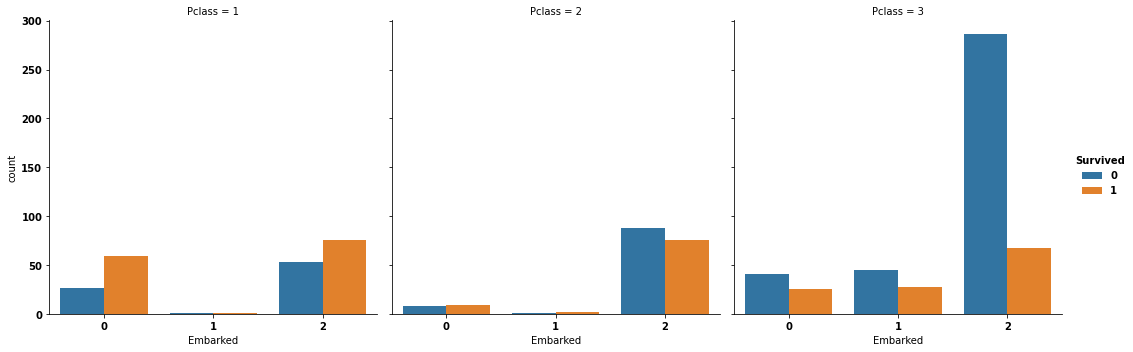

In [ ]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = updated_df)
plt.savefig('Embarked.png')